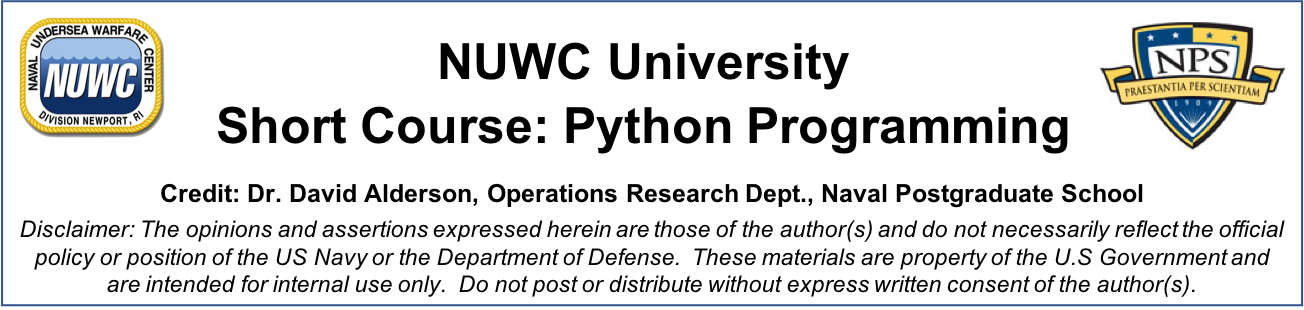

## <center>Lesson 1.6: Namespace, Importing</center>

## Namespaces

Namespaces are dictionaries that map *names* (variable names, function names, etc.) to values/functions.


Python maintains multiple namespaces (variable/function dictionaries) defined/accessed within the following scopes.  Each of these namespaces is created at different moments and has different lifetimes. 


* **Built-In:** this is the highest scope; this scope contains Python keywords and built-in functions stored in the dictionary accessible as \__builtin\__ - 
    
    * The **built-in namespace** is created when the Python interpreter starts up, and is never deleted.
    
    
* **Global:** this is the next highest scope; this namespace is accessible as \__main\__ ; these names are always available

    * The **global namespace** for a module is created when the module definition is read in; normally, module namespaces also last until the interpreter quits.



* **Enclosed:** this is a temporary scope that is the "next level up" from another local scope that occurs during the execution of nested functions; there may be multiple "enclosing" scopes during the execution of the function (when the function returns, these names are "dumped"); namespace lookup goes from the innermost to the outermost scope of nested functions (local scope/namespace is checked before enclosing scope/namespace)


* **Local:** this is the scope associated with the execution of a function; this namespace is temporary and is available only during the execution of a function.

  * The **local namespace** for a function is created when the function is called, and deleted (really, forgotten) when the function returns or raises an exception that is not handled within the function.
    

Namespaces are completely isolated (from each other).


**You can have the *SAME NAME* (variable name, function name, etc.) stored *SIMULTANEOUSLY* in multiple namespaces *WITH DIFFERENT VALUES/FUNCTIONS!!!**


**Python will never be confused** about which variable name it should use because...

* Python has a strict heirarchical process it goes through to map values to name (LEGB) ...


* However, **you may be confused** about which namespace Python is going to access...


* Because of this, you can introduce errors that are very difficult to find/debug.

In [1]:
# Here's how you can see the built-in functions in Python. 
# We'll show this syntax a little more tomorrow with OOP.
dir(__builtin__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

### Python Scope & Namespace Lookup Hierarchy

A scope is a textual region of a Python program where a namespace is directly accessible.

At any time during execution, there are several nested scopes whose namespaces are directly accessible:

<center><img src = "images/Name_Search.png" width=500></center>

When given a name, the Python interpreter searches from the "bottom" of the scoping hierarchy (i.e., the current location) to the "top".


* The interpreter looks first in the local namespace (within the function's namespace).


* Then it looks for it in any enclosing function namespaces.


* Then it looks for it in the global scope (_main_ namespace).


* Finally, it looks for it in the _builtins_ namespace (built in scope).  

Image Source:  http://sebastianraschka.com/Articles/2014_python_scope_and_namespaces.html

### Some Important Concepts in Namespace

* **Objects:**  everything in Python (values, functions, etc.) is an object; much more on this tomorrow.

In Python, every object that is created is given a number that uniquely identifies it. It is guaranteed that no two objects will have the same identifier during any period in which their lifetimes overlap. Once an object’s reference count drops to zero and it is garbage collected, then its identifying number becomes available and may be used again.


* **Objects vs. Names:**  names and objects can interact in different ways
    * objects have individuality, and multiple names (in multiple scopes) can be bound to the same object
    * two different objects can have the same name (but not in the same scope) 
    
    
* Variable assignments do not copy data - they just bind names to objects (we already talked about this in data structures)

```
x = dict()
y = x
```

* Deletions of variable names do not delete objects, they just remove the binding between name and object
    * the statement ```del x``` removes the binding of ```x``` from the namespace referenced by the local scope (i.e. deleteing x does not get rid of the dictionary it referred to - y remains bound to that object)


* **Importing:**  the basic idea of importing is to bring objects defined elsewhere (another scope) into the current namespace (or, binding a locally defined name with an object defined elsewhere - more to follow)

### The normal way of business: variables in a function are local (exist only in the function)

In [2]:
def normal():
    # do something
    a = 5  # assign a variable of local scope
    z = 1  # assign a variable of local scope
    # do something
    return

In [3]:
a = 1

print("a is %d" % a)

print("Running normal()")
normal()                   ### this function does not override the current value of a

print("Now a is %d" % a)

a is 1
Running normal()
Now a is 1


In [0]:
z

### The typical way to get around this is to pass in a reference to the object as a function argument

In [4]:
def passing_a_reference(some_reference):
    some_reference[1] = 5  # assumes what's passed can be indexed and has something at index 1

In [5]:
some_list = [1, 2, 3]

print("some list: ", some_list)

print("Running passing_a_reference()")
passing_a_reference(some_list)                   ### this function overrides one of the elements

print("some list: ", some_list)

some list:  [1, 2, 3]
Running passing_a_reference()
some list:  [1, 5, 3]


### Interactions Between Scopes (Local, Global, Built-In)

#### It is possible to create/update a variable in the global scope (\_main\_ namespace) from within a function (although this can be dangerous to do).

* This is done using the ```global``` keyword (see example below).

In [6]:
### Defining a variable in global scope from within a function

def override():
    global a
    a = 10
    return

In [7]:
a = 1

print("a is %d" % a)

print("Running function_override()")
override()                   ### this function overrides the current value of a

print("Now a is %d" % a)

a is 1
Running function_override()
Now a is 10


#### It is possible to use a variable defined at a higher level in the lookup hierarchy (without passing it as an explicit parameter to a function).

In [8]:
#### Fails because global_value isn't in any namespace

def local_func():
    local_value = 5
    sum = local_value + global_value
    return sum

local_func()

NameError: name 'global_value' is not defined

In [9]:
### Now works because after searching local namespace (not there),
###   the interpreter finds global_value in the global namespace

global_value = 10   # defined in global scope (i.e. _main_ namespace)

local_func()

15

#### It is possible to "override" the built-in namespace (this is very bad!).

*  A list of all the built-in functions for Python 3.x are available here:  https://docs.python.org/3/library/functions.html


* It is a very bad idea to ever use names in your programs that exist in the built-in namespace (see reference above for what these are).


* One frequently observed example is using the name "list" to hold a list you create, which overrides the *function* list in the ```__builtin__``` namespace. 
    

* Any modules you load into your program (numpy, matplotlib, math, etc) will expect to be able to use the functions provided in ```__builtin__```.
    

* The Python interpreter will find your name first, overriding the intended function, and many things will break.

### You can always find out what variables are in the global scope in interactive mode.

* This can be helpful during debugging sessions.


* Most good debuggers also provide this capability (remember when we watched our code execute in Pycharm during the debugging demo?).


* In interactive mode, the command to list all of the names in the \_main\_ namespace is: dir()


* When you do this in Jupyter Notebook, you get some "extra" stuff associated with the notebook file, but all of the names that are currently active are in there (see below).


* Note that the list below contains [ a, global_value, function_override, and local_func ] but *does not contain* local_value.


* "local_value" exists only within the local scope that is created when local_func is evaluated.

In [25]:
### What names are in the current (global) scope?
dir()

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'In',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'Out',
 'PINF',
 'PZERO',
 'RAISE',
 'Random',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'SystemRandom',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_',
 '_1',
 '_10',
 '_12',
 '_14',
 '_16',
 '_17',
 '_23',
 '_24',
 '_9',
 '_UFUNC_API',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_dh',
 '_i',

In [11]:
# if we create a new variable, it appears in the namespace
z = 5
myname = 'Guido'
mylist = [1,2,3]
mydict = {}

In [26]:
dir()

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'In',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'Out',
 'PINF',
 'PZERO',
 'RAISE',
 'Random',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'SystemRandom',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_',
 '_1',
 '_10',
 '_12',
 '_14',
 '_16',
 '_17',
 '_23',
 '_24',
 '_25',
 '_9',
 '_UFUNC_API',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_dh'

<h3>removing items from the namespace with <code>del</code></h3>

In [12]:
# recall our variable z
z

5

In [13]:
# the statement del x removes the binding of x from the namespace 
# referenced by the local scope.
del z

In [27]:
dir()

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'In',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'Out',
 'PINF',
 'PZERO',
 'RAISE',
 'Random',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'SystemRandom',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_',
 '_1',
 '_10',
 '_12',
 '_14',
 '_16',
 '_17',
 '_23',
 '_24',
 '_25',
 '_26',
 '_9',
 '_UFUNC_API',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc'

In [15]:
z

NameError: name 'z' is not defined

## Importing modules, functions (into the current namespace)

### Different Ways to Import Modules (and their effects)

* ``import SomeModule``
    * Example Import Statement: ``import random``
    * What Happens: you can now access any function in the random module by calling ``random.desired_function``
    * Example Use Case: ``random.randint(1,10)`` 
    * Strength:  You get all functions in that module available for use; no "namespace pollution"; this is the recommended approach
    * Weakness: You have to specify which module/namespace (i.e. dictionary) to reference to use any function/variable/name from this module (i.e. the name is long because it is module.name)


* ``import SomeModule as abbrv``
    * Example Import Statement: ``import numpy as np``
    * Strength: Same as above but you define an abbreviation for the longer name to use as a prefix (instead of calling ``SomeModule.desired_function``, you call ``abbrv.desired_function``)


* ``from SomeModule import function1, function2, function3``
    * Note:  this approach often includes an "as" statement
    * Example Import Statement:  ``from matplotlib import pyplot as plt``
    * Example Use Case: plt.hist(my_data)
    * Strength:  you can now access functions/variables using a shorthand notation
    * Weakness: whatever names (variable names, function names) you import this way are now stored in the global scope, so they can't be used for anything else
    
    
* ``from SomeModule import *``
    * Example Import Statement: ``from random import *``
    * Example Use Case: randint(1,6) 
    * Note: observe that there is no need to call random.randint 
    * Strength: you save yourself some typing
    * Weakness: you may have just loaded/overwritten (many) names into your global namespace that you are unaware of; this often leads to "namespace pollution"; **not recommended; don't do this**



Let's take a look at each of these one at a time.

In [16]:
# This is the most basic way to import a module
import numpy

# to use a module, type: module.function(input), more on this synatx tomorrow
numpy.sin(.5)

0.479425538604203

Import random and call the randint(1,6) function inside the module

In [29]:
import random as billy

Import the glob module and call the glob("*") function within the glob module

In [33]:
import pylab as plt

Module names can be abbreviated like this:

In [32]:
# Module name abbreviation
import numpy as np # Python programmers almost always import numpy as np

np.sin(.5)

0.479425538604203

Import pylab as plt and evaluate the following code (write it out, don't copy):

```python 
x = plt.arange(0,10,.1)
y = plt.sin(x)
plt.plot(x,y)
plt.show()
```

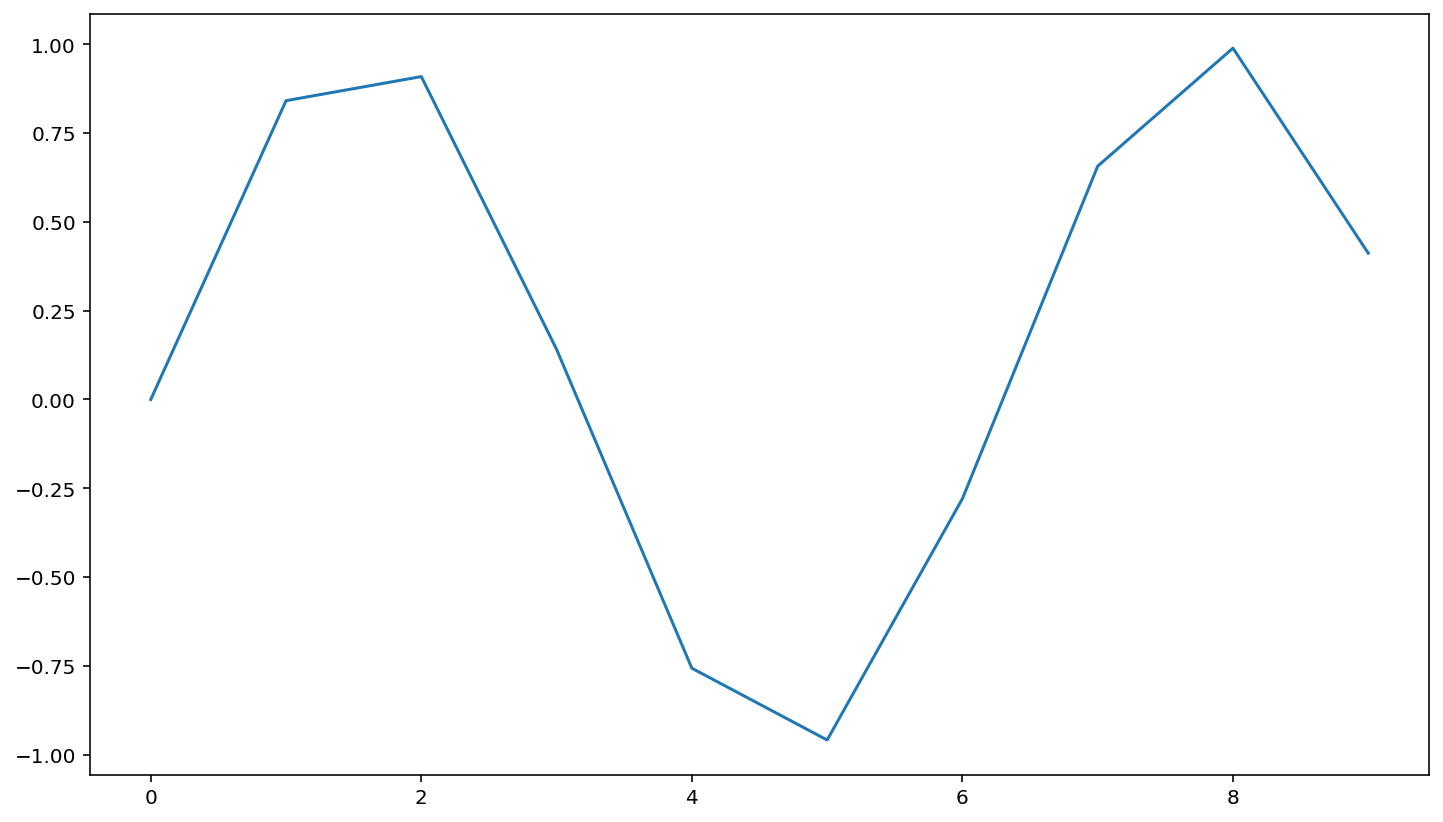

In [36]:
import pylab as plt

x = plt.arange(0,10,1)
y = plt.sin(x)
plt.plot(x,y)
plt.show()

We can also import specific functions within a module

In [18]:
from scipy import io # fun fact, you can also write "import scipy.io" but more on this tomorrow

In [19]:
?io

Type:        module
String form: <module 'scipy.io' from '/usr/local/lib/python3.8/dist-packages/scipy/io/__init__.py'>
File:        /usr/local/lib/python3.8/dist-packages/scipy/io/__init__.py
Docstring:  
Input and output (:mod:`scipy.io`)

.. currentmodule:: scipy.io

SciPy has many modules, classes, and functions available to read data
from and write data to a variety of file formats.

.. seealso:: `NumPy IO routines <https://www.numpy.org/devdocs/reference/routines.io.html>`__

MATLAB® files

.. autosummary::
   :toctree: generated/

   loadmat - Read a MATLAB style mat file (version 4 through 7.1)
   savemat - Write a MATLAB style mat file (version 4 through 7.1)
   whosmat - List contents of a MATLAB style mat file (version 4 through 7.1)

IDL® files

.. autosummary::
   :toctree: generated/

   readsav - Read an IDL 'save' file

Matrix Market files

.. autosummary::
   :toctree: generated/

   mminfo - Query matrix info from Matrix Market formatted file
   mmread - Read matrix f

Now we can do some fun things...

In [20]:
from scipy import signal as sp, integrate as igrt, fftpack as fp

In [21]:
from numpy import fft as nfft
from scipy import ndimage as img

# Alternate syntax using dot notion
# import numpy.fft as nfft, scipy.ndimage as img

And now the bad example of what you shouldn't do...

In [22]:
from numpy import *
from random import *

In [23]:
# Here is why you shouldn't do this, look at this polluted namespace
# There are also functions with the same name in different modules that have overwritten each other
dir()

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'In',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'Out',
 'PINF',
 'PZERO',
 'RAISE',
 'Random',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'SystemRandom',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_',
 '_1',
 '_10',
 '_12',
 '_14',
 '_16',
 '_17',
 '_9',
 '_UFUNC_API',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_dh',
 '_i',
 '_i1',
 '_i10'

Only use this when you are writing temporary quick and dirty code and even then, use sparingly. 

## <font color="red">Activity - Write a function for a line array and import the numpy package:</font>
$B_u(u)=\frac{1}{N}\frac{sin(\pi N u d/\lambda)}{sin(\pi u d/\lambda)}$

$N$: number of sensors <br>
$\lambda$: Wavelength <br>
$d$: distance between sensors <br>
$u$: Normalized bearing between -1,1 ($u=cos \theta$) 

Import numpy to use sin and $\pi$

In [46]:
import numpy as np

np.pi = pi

def LineArray(N,u,d,lam):
    return 1/N * (np.sin(pi*N*Nu*d/lam))/(np.sin(pi*u*d/lam))

In [43]:
from matploylib import phlab as plt

u = np.linspace(-1,1,200)

plt.plot(u,np.abs(LineArray(11,u,1,2)),'r')
plt.title('Hi There')
plt.ylabel('abs(B)')

ModuleNotFoundError: No module named 'matploylib'

### <font color="red"> Activity </font>
* Import the scikit image package (**package name: skimage**)
* Look up the different sub packages
* Import two or three specific subpackages 
* Try getting some of the functions to work. 